<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2024/blob/main/IMT_CD_Distributions_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Funções de Distribuição**

---

In [ ]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['figure.figsize'] = (5, 3)

# Gerando dados de uma distribuição Normal



## `rvs(loc=0, scale=1, size=1, random_state=None)`

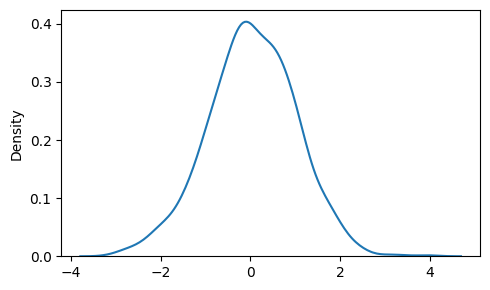

In [ ]:
from scipy.stats import norm
values = norm.rvs(loc=0,scale=1,size=1000,random_state=1)

fig, ax = plt.subplots(1,1)

sns.kdeplot(x=values,ax=ax)

plt.tight_layout()
plt.show()

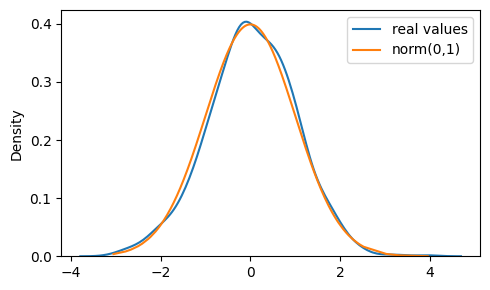

In [ ]:
values = norm.rvs(loc=0,scale=1,size=1000,random_state=1)

fig, ax = plt.subplots(1,1)

sns.kdeplot(x=values,ax=ax,label='real values')

values_norm = []
for v in values:
    values_norm.append(norm.pdf(v,loc=0,scale=1))

values_norm = np.array(values_norm)

sns.lineplot(x=values, y=values_norm, ax=ax, label='norm(0,1)')

plt.legend()
plt.tight_layout()
plt.show()

## Diferentes médias e dispersão dos dados

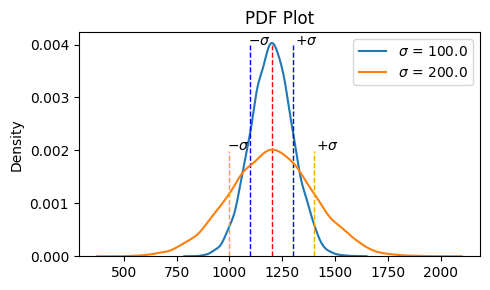

In [ ]:
fig, ax = plt.subplots(1,1)

values = norm.rvs(loc=1200,scale=100,size=10000,random_state=1)
sns.kdeplot(values,ax=ax,label='$\\sigma$ = ' + str(np.round(values.std(),0)))
ax.vlines(1200-values.std(),0,norm.pdf(1200,loc=1200,scale=100),linestyle='--',color='b',lw=1)
ax.vlines(1200+values.std(),0,norm.pdf(1200,loc=1200,scale=100),linestyle='--',color='b',lw=1)
ax.vlines(1200,0,norm.pdf(1200,loc=1200,scale=100),linestyle='--',color='r',lw=1)

values2 = norm.rvs(loc=1200,scale=200,size=10000,random_state=1)
sns.kdeplot(values2,ax=ax,label='$\\sigma$ = ' + str(np.round(values2.std(),0)))
ax.vlines(1200-values2.std(),0,norm.pdf(1200,loc=1200,scale=200),linestyle='--',color='orange',lw=1)
ax.vlines(1200+values2.std(),0,norm.pdf(1200,loc=1200,scale=200),linestyle='--',color='orange',lw=1)

ax.text(1200+values2.std()+10,0.002,'$+\\sigma$')
ax.text(1200-values2.std()-10,0.002,'$-\\sigma$')

ax.text(1200+values.std()+10,0.004,'$+\\sigma$')
ax.text(1200-values.std()-10,0.004,'$-\\sigma$')

ax.set_title('PDF Plot')

plt.legend()
plt.tight_layout()
plt.show()

# PDF, CDF e PPF

* PDF, probability distribution function
* CDF, cummulative distribution function
* PPF, percent point function



[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038]


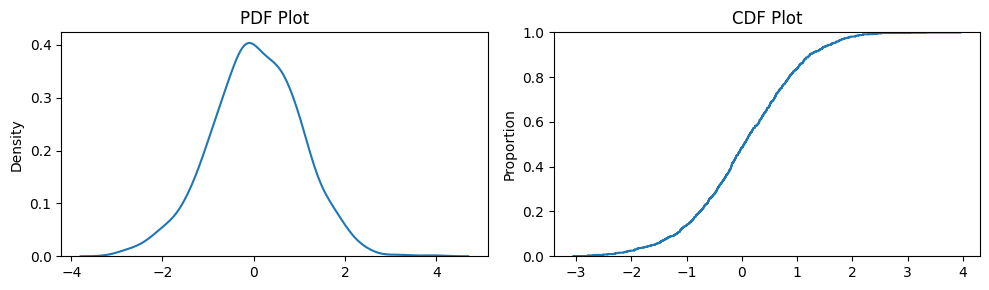

In [ ]:
from scipy.stats import norm

values = norm.rvs(size=1000, random_state=1)
print(values[0:10])

fig, ax = plt.subplots(1,2,figsize=(10,3))

sns.kdeplot(values,ax=ax[0])
ax[0].set_title('PDF Plot')
sns.ecdfplot(values,ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038]


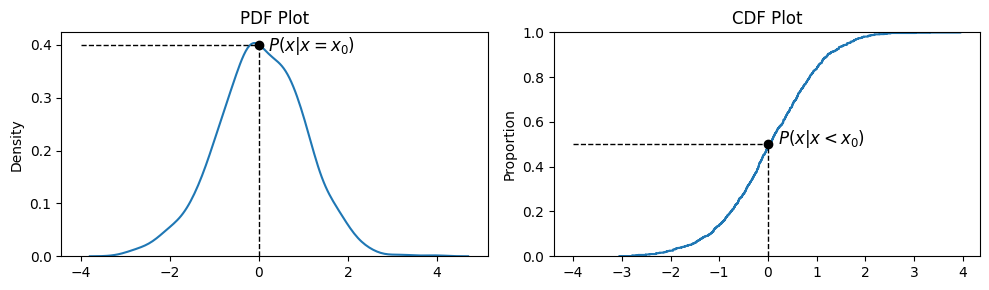

In [ ]:


from scipy.stats import norm

values = norm.rvs(size=1000, random_state=1)
print(values[0:10])

fig, ax = plt.subplots(1,2,figsize=(10,3))

sns.kdeplot(values,ax=ax[0])
ax[0].vlines(0,0,norm.pdf(0),linestyle='--',color='k',lw=1)
ax[0].hlines(norm.pdf(0),-4,0,linestyle='--',color='k',lw=1)
ax[0].plot(0,norm.pdf(0),'ko')

ax[0].text(0+0.2,norm.pdf(0)-.01,'$P(x | x = x_0)$',fontsize=12)

ax[0].set_title('PDF Plot')

sns.ecdfplot(values,ax=ax[1])
ax[1].vlines(0,0,norm.cdf(0),linestyle='--',color='k',lw=1)
ax[1].hlines(norm.cdf(0),-4,0,linestyle='--',color='k',lw=1)
ax[1].plot(0,norm.cdf(0),'ko')

ax[1].text(0+0.2,norm.cdf(0),'$P(x | x < x_0)$',fontsize=12)

ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

## `pdf(x, loc=0, scale=1)`, $P(x=x_0)$

Obtém a *probabilidade* para um ponto específico. De fato, pouca aplicabilidade prática já que um ponto em uma probabilidade de valores contínuos tem probabilidade 0.

In [ ]:
norm.pdf(0) # probability distribution function

0.3989422804014327

## `cdf(x, loc=0, scale=1)`, $P(x | x\le x_0)$


In [ ]:
norm.cdf(0) # cummulative distribution function

0.5

## `ppf(x, loc=0, scale=1)`, $x_0 | P(x|x\le x_0) = p$

É o inverso da `cdf`.

In [ ]:
norm.ppf(0.5) # percent point function

0.0

# Exemplo

Uma fábrica produz HDs SSD com uma vida útil de 5 anos. Sabe-se que o desvio padrão da durabilidade desses HDs é de 5 meses.




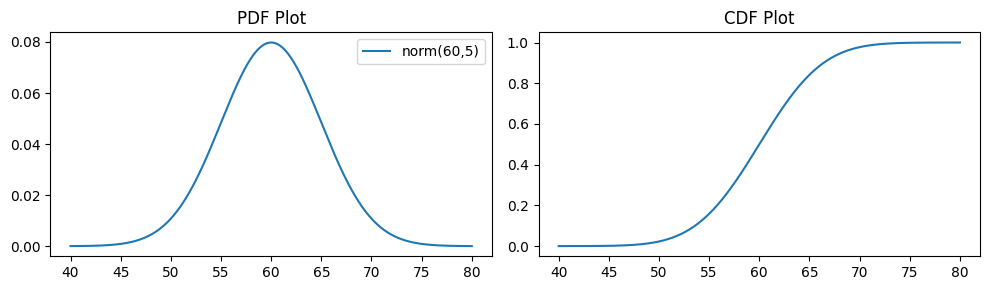

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

mu = 5*12
sigma = 5
values_norm = []
points = np.linspace(mu - 4*sigma, mu + 4*sigma,1000)

for v in points:
    values_norm.append(norm.pdf(v,loc=mu,scale=sigma))

values_norm = np.array(values_norm)

sns.lineplot(x=points, y=values_norm, ax=ax[0], label='norm(' + str(mu) + ',' + str(sigma) + ')')
ax[0].set_title('PDF Plot')
ax[0].legend()

values_cdf = []

for v in points:
    values_cdf.append(norm.cdf(v,loc=mu,scale=sigma))

values_cdf = np.array(values_cdf)

sns.lineplot(x=points, y=values_cdf,ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

Estime o número de HDs que precisarão ser trocados após 48 meses.

In [ ]:
norm.cdf(48,loc=mu,scale=sigma) * 1000

8.197535924596131

Você faz uma reserva técnicas comprando 10% de HDs para trocas. Essa reserva deve garantir quantos meses de trocas?

In [ ]:
norm.ppf(0.10,loc=mu,scale=sigma)

53.592242172277

# Exemplo

Você compra mil sacas de café de 60Kg. O fornecedor garante um desvio padrão de 200g por saca. Qual a chance de você obter em 100 sacas uma saca com menos de 59.5Kg?




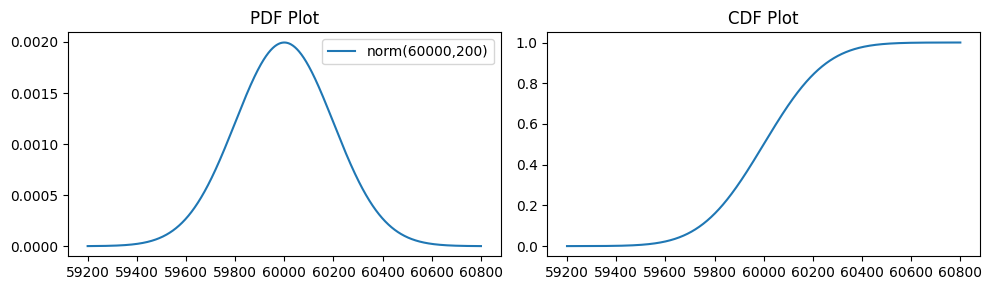

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

mu = 60000    # Evite mu = 60, sigma = 0.2 para o PDF
sigma = 200
values_norm = []
points = np.linspace(mu - 4*sigma, mu + 4*sigma,1000)

for v in points:
    values_norm.append(norm.pdf(v,loc=mu,scale=sigma))

values_norm = np.array(values_norm)

sns.lineplot(x=points, y=values_norm, ax=ax[0], label='norm(' + str(mu) + ',' + str(sigma) + ')')
ax[0].set_title('PDF Plot')
ax[0].legend()

values_cdf = []

for v in points:
    values_cdf.append(norm.cdf(v,loc=mu,scale=sigma))

values_cdf = np.array(values_cdf)

sns.lineplot(x=points, y=values_cdf,ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

Qual a probabilidade de você obter sacas com peso abaixo ou acima de 2 e 3 vezes o desvio padrão?

In [ ]:
2 * norm.cdf(60000 - 2*200, loc=60000, scale=200)

0.04550026389635839

In [ ]:
2 * norm.cdf(60000 - 3*200, loc=60000, scale=200)

0.0026997960632601866

Você encontrou em uma amostra das 100 sacas adquiridas 2 sacas pouco abaixo de 59.6 Kg. Você pode considerar que a informação do fornecedor é confiável? **Ainda, sim.**

In [ ]:
norm.ppf(0.02,loc=60000,scale=200)

59589.25021787363

Sendo verdadeira a informação do fornecedor, qual o intervalo de peso que você deve encontrar em 95% das amostras?

In [ ]:
norm.ppf(1 - 0.025,loc=60000,scale=200)

60391.99279690801

In [ ]:
norm.ppf(0.025,loc=60000,scale=200)

59608.00720309199

# Intervalo de Confiança, `interval(confidence, loc=0, scale=1)`

In [ ]:
norm.interval(0.95, loc=60000, scale=200)

(59608.00720309199, 60391.99279690801)

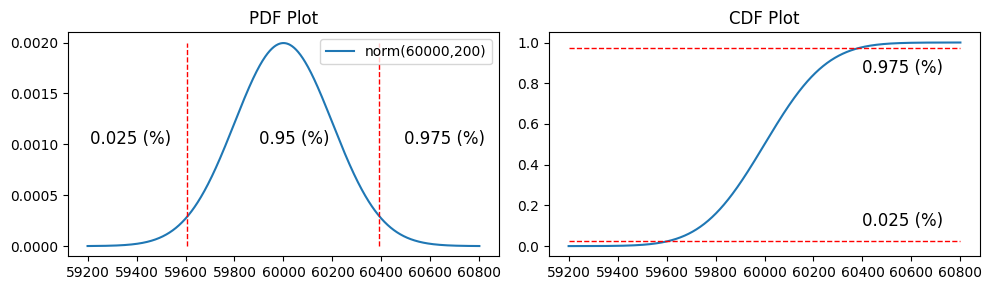

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

mu = 60000
sigma = 200
values_norm = []
points = np.linspace(mu - 4*sigma, mu + 4*sigma,1000)

for v in points:
    values_norm.append(norm.pdf(v,loc=mu,scale=sigma))

values_norm = np.array(values_norm)

sns.lineplot(x=points, y=values_norm, ax=ax[0], label='norm(' + str(mu) + ',' + str(sigma) + ')')

ax[0].vlines(norm.interval(0.95, loc=60000, scale=200)[0],0,0.002,color='r',linestyle='--',lw=1)
ax[0].vlines(norm.interval(0.95, loc=60000, scale=200)[1],0,0.002,color='r',linestyle='--',lw=1)

ax[0].set_title('PDF Plot')
ax[0].text(60000-100,0.001,'0.95 (%)',fontsize=12)

ax[0].text(norm.interval(0.95, loc=60000, scale=200)[0]-400,0.001,'0.025 (%)',fontsize=12)
ax[0].text(norm.interval(0.95, loc=60000, scale=200)[1]+100,0.001,'0.975 (%)',fontsize=12)

ax[0].legend()

values_cdf = []

for v in points:
    values_cdf.append(norm.cdf(v,loc=mu,scale=sigma))

values_cdf = np.array(values_cdf)

sns.lineplot(x=points, y=values_cdf,ax=ax[1])
ax[1].hlines(0.975, 60000-4*200,60000+4*200,color='r',linestyle='--',lw=1)
ax[1].hlines(0.025,60000-4*200,60000+4*200,color='r',linestyle='--',lw=1)

ax[1].text(60400,0.1,'0.025 (%)',fontsize=12)
ax[1].text(60400,0.85,'0.975 (%)',fontsize=12)

ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

# Minha distribuição é normal? qqplot, `stats.probplot()`

Apesar de haverem testes sobre normalidade a inspeção visual é frequentemente empregada com o uso de gráficos qqplot.

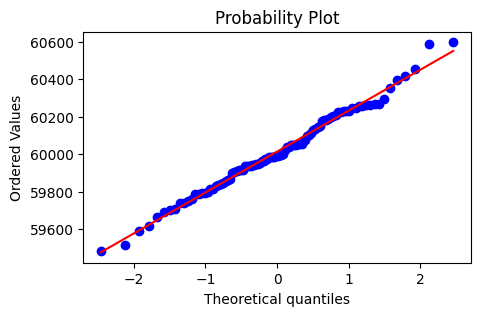

In [ ]:
from scipy.stats import probplot

fig, ax = plt.subplots(1,1)

values = norm.rvs(loc=60000, scale=200, size=100)
stats.probplot(values, dist='norm', fit=True, plot=ax)
plt.show()

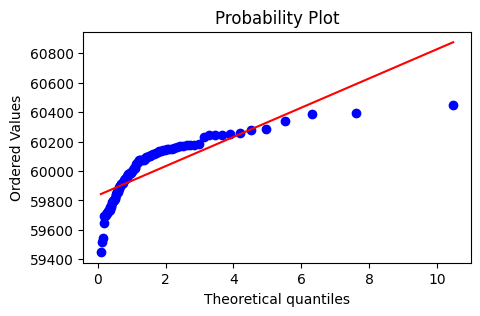

In [ ]:
from scipy.stats import probplot
from scipy.stats import lognorm

fig, ax = plt.subplots(1,1)

values = norm.rvs(loc=60000, scale=200, size=100)
stats.probplot(values, dist=stats.lognorm(0.954), fit=True, plot=ax)
plt.show()

# Outras distribuições


[SciPy Stats](https://docs.scipy.org/doc/scipy/tutorial/stats.html)



## Lognorm

[4.70970596 0.55787764 0.60418439 0.3592948  2.28324774 0.11128421
 5.28329747 0.4837479  1.35576151 0.78828204]


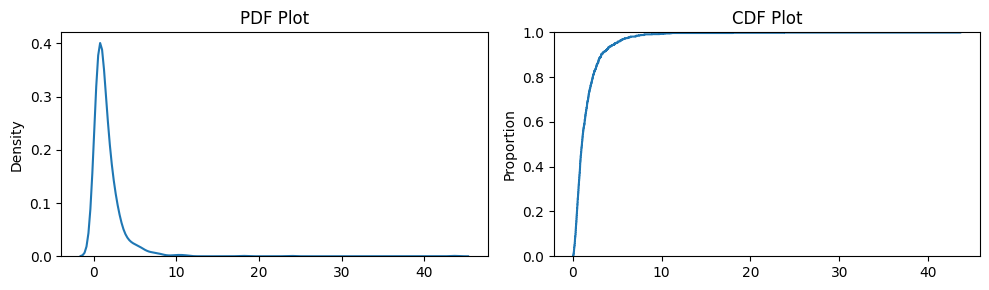

In [ ]:
from scipy.stats import lognorm

rv = lognorm(0.954)
values = rv.rvs(size=1000, random_state=1)
print(values[0:10])

fig, ax = plt.subplots(1,2,figsize=(10,3))

sns.kdeplot(values,ax=ax[0])
ax[0].set_title('PDF Plot')
sns.ecdfplot(values,ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

## gamma

[4.75021203 0.98742605 1.06559722 0.62384076 5.07008018 0.85735877
 4.34109604 0.16815469 3.58637333 0.60594455]


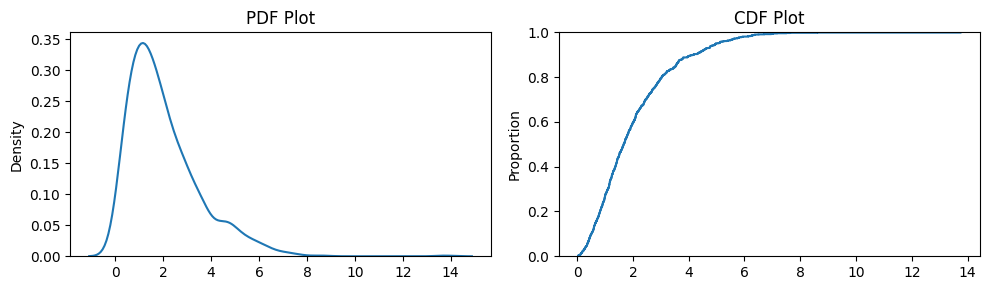

In [ ]:
from scipy.stats import gamma

rv = gamma(1.99)
values = rv.rvs(size=1000, random_state=1)
print(values[0:10])

fig, ax = plt.subplots(1,2,figsize=(10,3))

sns.kdeplot(values,ax=ax[0])
ax[0].set_title('PDF Plot')
sns.ecdfplot(values,ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

## expon

[1.03960584 1.77412525 0.50011438 0.86001275 0.6587096  0.59688387
 0.70611463 0.92397648 1.00545254 1.27395977]


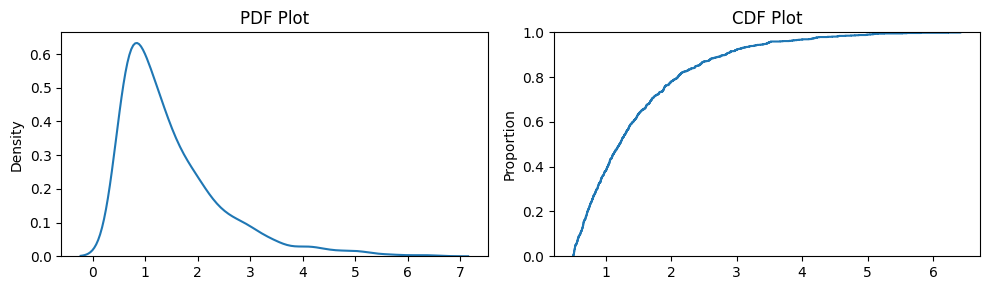

In [ ]:
from scipy.stats import expon

rv = expon(1/2)
values = rv.rvs(size=1000, random_state=1)
print(values[0:10])

fig, ax = plt.subplots(1,2,figsize=(10,3))

sns.kdeplot(values,ax=ax[0])
ax[0].set_title('PDF Plot')
sns.ecdfplot(values,ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

## t-student

Uma distribuição importante usada quando esperamos uma distribuição normal, mas não temos a população, apenas uma amostra dos dados.

[ 2.61103204 -1.17044637 -1.16204805 -1.69123532  0.41674013 -0.49759053
 -0.45341236  0.70598317 -0.32951745  1.88563226]


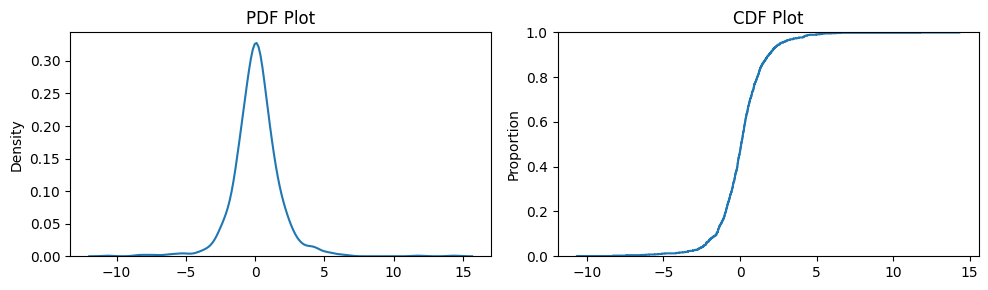

In [ ]:
from scipy.stats import t

rv = t(2.74)
values = rv.rvs(size=1000, random_state=1)
print(values[0:10])

fig, ax = plt.subplots(1,2,figsize=(10,3))

sns.kdeplot(values,ax=ax[0])
ax[0].set_title('PDF Plot')
sns.ecdfplot(values,ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

Para todas valem as funções,

## `rv.rvs()`
## `rv.pdf()`  
## `rv.cdf()`
## `rv.ppf()`

Embora, cada uma, tenha os seus parâmetros específicos. Para distribuições discretas, troque `pdf` por `pmf`, e assim por diante.

In [ ]:
from sklearn.neighbors import KernelDensity
from scipy.misc import derivative
from scipy.integrate import quad

kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X[:, np.newaxis])
gmm_pdf = lambda x: np.exp(kde.score(np.array([x]).reshape(-1, 1)))

x = np.arange(-5, 10.1, 0.1)
y_cdf = np.array([tup[0] for tup in [quad(gmm_pdf, a, b) for a, b in [(a, b) for a, b in zip(x, x[1:len(x)])]]] + [0]).cumsum()


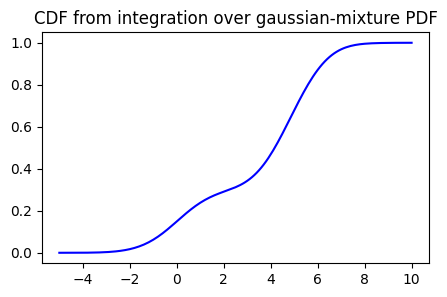

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, y_cdf, color='b')
ax.set_title('CDF from integration over gaussian-mixture PDF')

plt.show()

In [ ]:
cdf = pd.DataFrame()
cdf['value'] = x
cdf['prob'] = y_cdf

cdf.head()

,value,prob
0,-5.0,0.000003
1,-4.9,0.000007
2,-4.8,0.000013
3,-4.7,0.000022
4,-4.6,0.000034


In [ ]:
cdf[ (cdf.value >=2.9) & (cdf.value <= 3) ]

,value,prob
80,3.0,0.342524


In [ ]:
cdf[ (cdf.prob <= 0.36) ].tail()

,value,prob
78,2.8,0.328491
79,2.9,0.335148
80,3.0,0.342524
81,3.1,0.350695
82,3.2,0.359734
